In [1]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
# %matplotlib widget

# If you are using Jupyter Notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from scipy import signal

In [3]:
def pole_zero_plot(b, a):
    from matplotlib import patches

    zeros, poles, _ = signal.tf2zpk(b, a)
    print("zeros: ", zeros, "\n poles:", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    plt.figure()
    ax = plt.subplot(1, 1, 1)
    
    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    plt.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    plt.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)
    
    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        plt.text(pos.real, pos.imag, c, fontsize=12)

    plt.axis('scaled')
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    
    plt.xlabel('Re')
    plt.ylabel('Im')
    
def plot_freq_response(b, a, sampling_rate=None, log_y=True,create_new_fig=True):
    """Plot the freq response of a window.
    
    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()
    # Calculate the frequency response using scipy.signal.freqz 
    # Use the fs parameter to calculate the output relative to the sampling rate
    w, h = signal.freqz(b, a, fs=sampling_rate)    
    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')
    
    ax1.plot(w, h_plot, 'b')
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Exercise 7.1: LTI Systems

Given the following discrete LTI system:
$y[n] - \frac{1}{2}y[n-1] + \frac{1}{4} y[n-2] = x[n]$

Note: If you do not know how to approach this problem, don't worry.
We will do this calculation in detail on the White Board next week.

a) What is the transfer function $H(z) = \frac{Y(z)}{X(z)}$ of the system?

b) Verify if the system is stable using a pole-zero plot.

c) What are the "a" and "b" parameters (numerator, denominator representation) of the filter?

### Solution:
a)

For LTI systems provided in this form, we can directly perform a z-transform by subsituting $y[n-i]$ by $z^{-i}Y[z]$:

$$Y[z] - \frac{1}{2} z^{-1} Y[z] + \frac{1}{4}z^{-2} Y[z] = X[z]$$

Using the definiton of our transferfunction ($H(z) = \frac{Y(z)}{X(z)}$), we can rearange to equation:

$$\left(1-\frac{1}{2}z^{-1} + \frac{1}{4} z^{-2}\right) Y[z] = X[z]$$

$$H[z] = \frac{Y(z)}{X(z)} = \frac{1}{\left( 1 - \frac{1}{2} z^{-1} + \frac{1}{4} z^{-2} \right)}$$

This is the “negative powers” discrete-time form of our transfer function (all exponents of z are negative).
For most use cases it is easier to transform it into the “positive powers” form (all exponents of z are positive).
We can do this by expanding the fraction using the highest negative exponent in the transfer function:

\begin{align}
H[z] &= \frac{1}{\left( 1 - \frac{1}{2} z^{-1} + \frac{1}{4} z^{-2} \right)} \frac{z^2}{z^2}\\
&= \frac{z^2}{z^2 - \frac{1}{2}z + \frac{1}{4}}
\end{align}

For clarity we add all the “zero” terms:

$$
H[z] = \frac{1\cdot z^2 + 0\cdot z^1 + 0\cdot z^0}{1\cdot z^2 - \frac{1}{2}z^1 + \frac{1}{4} z^0}
$$



b)

Using the “positive powers” form we can easily calculate the poles and zeros, by setting either the nominator or the denominator to 0:

Zeros:
$$
1\cdot z^2 + 0\cdot z^1 + 0\cdot z^0 = 0 \rightarrow z_{1,2} = 0
$$

Poles:
$$
1\cdot z^2 - \frac{1}{2}z^1 + \frac{1}{4} z^0 = 0
$$
Using the p,q - formula:

\begin{align}
z_{1,2} &= - \frac{p}{2} \pm \sqrt{\left(\frac{p}{2}\right)^2 - q}\\
&= \frac{1}{4} \pm \sqrt{\frac{1}{16} - \frac{1}{4}}\\
&= \frac{1}{4} \pm \frac{\sqrt{-3}}{4}\\
&= \frac{1}{4} \pm i \frac{\sqrt{3}}{4}\\
&\approx 0.25 \pm i 0.43
\end{align}


The system is stable, because all poles are within the unit circle.

c)

The parameters can be directly extracted from the “positive powers” form starting with the highest exponent:

a (from the **denominator**): $1\cdot z^2 - \frac{1}{2}z^1 + \frac{1}{4} z^0 \rightarrow a=[1,-0.5,0.25]$

b (from the **numerator**): $1\cdot z^2 + 0\cdot z^1 + 0\cdot z^0 \rightarrow b=[1,0,0]$


zeros:  [0. 0.] 
 poles: [0.25+0.4330127j 0.25-0.4330127j]


<IPython.core.display.Javascript object>


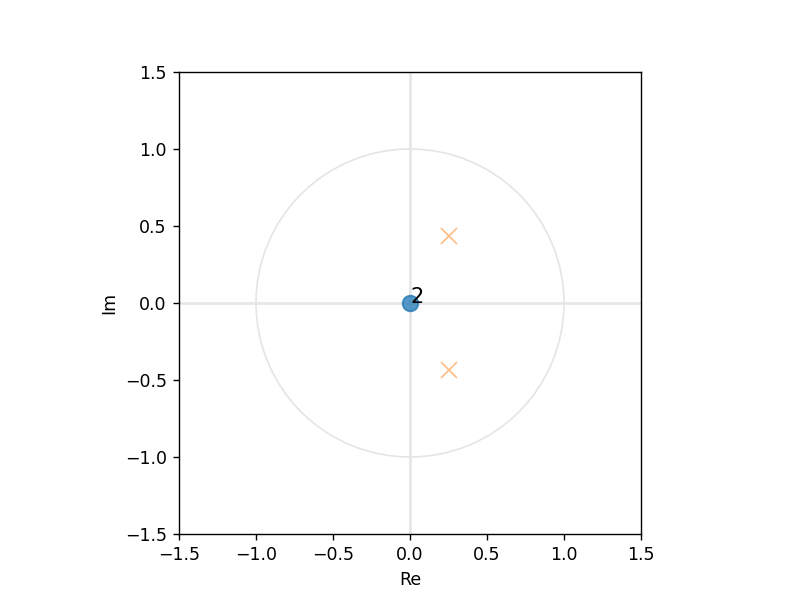

In [4]:
# You can perform the analysis using python if you want
### BEGIN SOLUTION
a = np.array([1, -0.5, 0.25])  # denominator
b = np.array([1, 0, 0])  # numerator
pole_zero_plot(b, a) 
### END SOLUTION

## Exercise 7.2: Combining Filter

In the lecture we learned about the difference filter and ways to improve it.
In this exercise we reimplement this filter and its modifications.

At every step, use the lecture slides to get the transfer function and then calculate the filter parameters from the information provided there.

a) Plot the frequency response and the pole-zero plot for a first order difference filter. You can use the helper functions above. Use a sampling rate of 360Hz

b) Plot the frequency response and the pole-zero plot for 2 Point moving average. You can use the helper functions above. Use a sampling rate of 360Hz

c) Combine both filters into Three-point central difference operator. Can you predict the Pole-Zero Plot of the final filter?

d) Apply the combined filter to the example ECG signal provided by `scipy` and compare the results to the lecture slides

### Solution:

There are two ways to calculate the filter parameters:

Use the zeros and poles from the lecture slides and calculate the “a”s and “b”s using `scipy.signal.zpk2tf` or by calculating the positive finite form of the transfer function.
Below is an example for the three-point central difference operator.
You can calculate the other transfer functions in the same way.

Transfer function in “negative powers” discrete-time form (negative exponents on $z$):

$H(z) = \frac{1}{2T}(1- z^{-2})$

Expand the fraction using the highest negative exponent:

$H(z) = \frac{1}{2T}(1- z^{-2}) \cdot \frac{z^2}{z^2} = \frac{1}{2T} \frac{z^2 - 1}{z^2}$

Add lower z-term for clarity:

$H(z) = \frac{1}{2T} \frac{1\cdot z^2 + 0\cdot z^1 - 1\cdot z^0}{1 \cdot z^2 + 0\cdot z^1 + 0\cdot z^0}$

Read the coefficients from the highest to the lowest exponent:

b (Numerator): $[1, 0, -1]$

a (Denominator): $[1, 0, 0]$

Important: Do not leave out the trailing zeros!



<IPython.core.display.Javascript object>


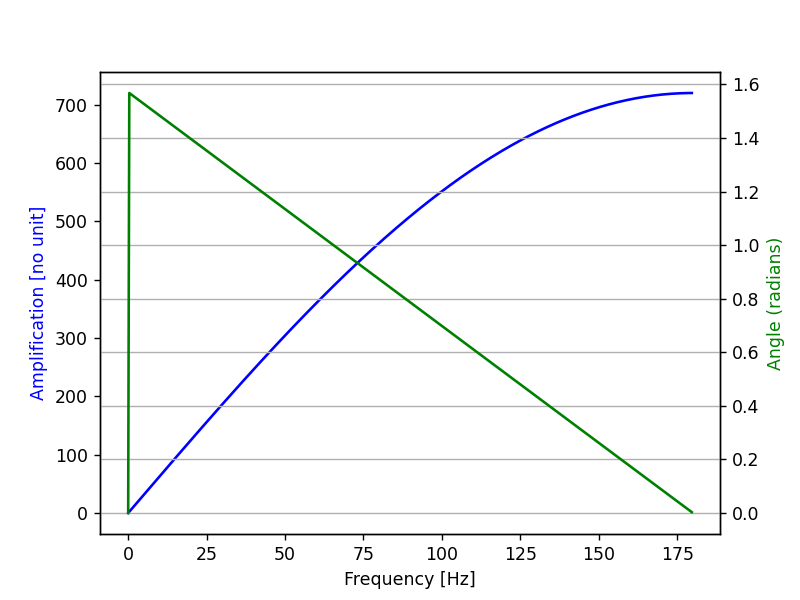

zeros:  [1.] 
 poles: [0.]


<IPython.core.display.Javascript object>


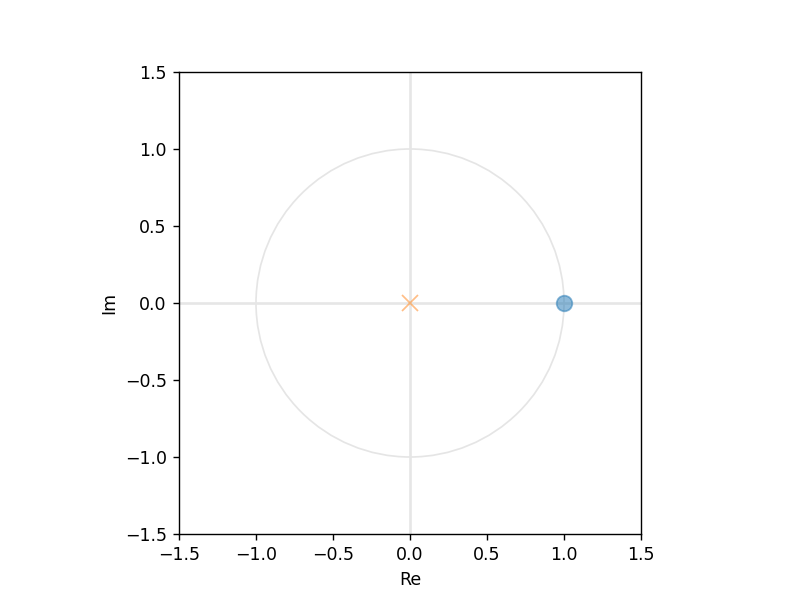

In [5]:
# First order difference filter
### BEGIN SOLUTION
sampling_rate = 360
diff_filter_a = [1, 0]
diff_filter_b = np.array([1, -1]) * sampling_rate
plot_freq_response(diff_filter_b, diff_filter_a, sampling_rate=sampling_rate, log_y=False)
pole_zero_plot(diff_filter_b, diff_filter_a)
### END SOLUTION

<IPython.core.display.Javascript object>


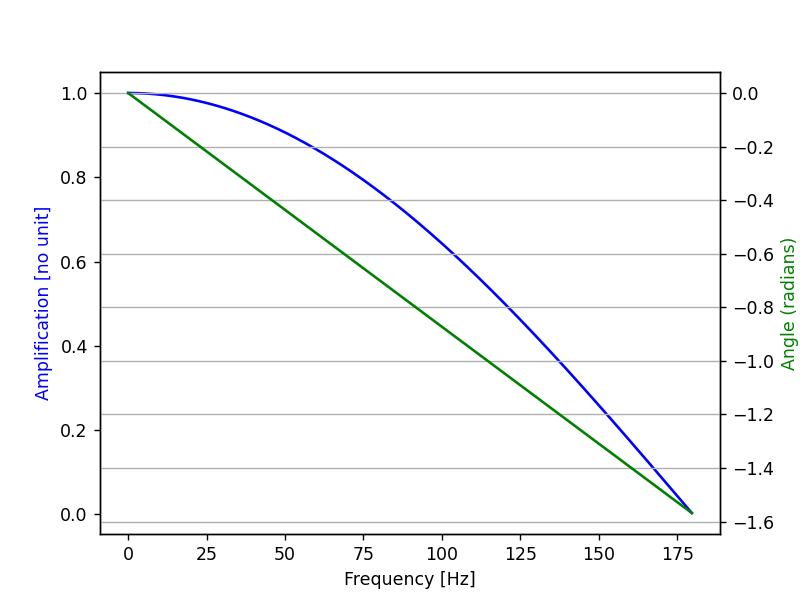

zeros:  [-1.] 
 poles: [0.]


<IPython.core.display.Javascript object>


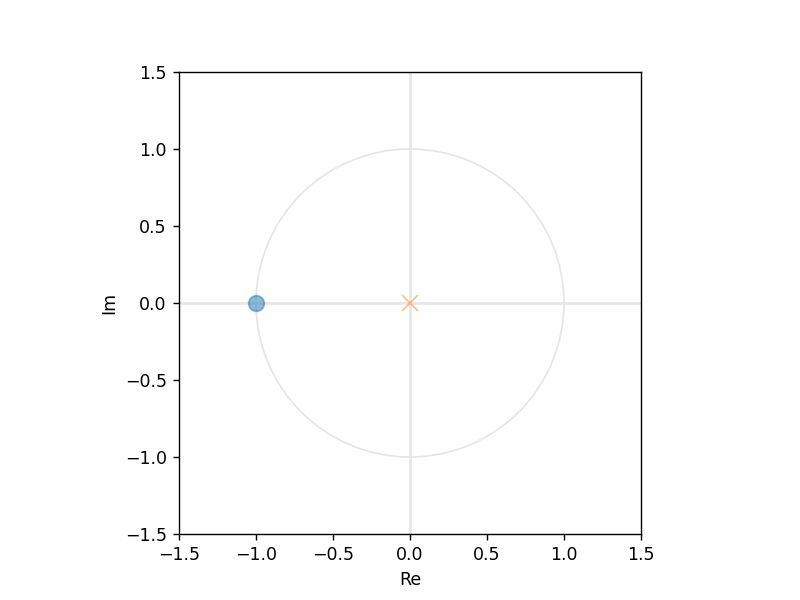

In [6]:
# First 2 point moving average
### BEGIN SOLUTION
ma_filter_a = [1, 0]
ma_filter_b = [0.5, 0.5]
plot_freq_response(ma_filter_b, ma_filter_a, sampling_rate=sampling_rate, log_y=False)
pole_zero_plot(ma_filter_b, ma_filter_a)
### END SOLUTION

<IPython.core.display.Javascript object>


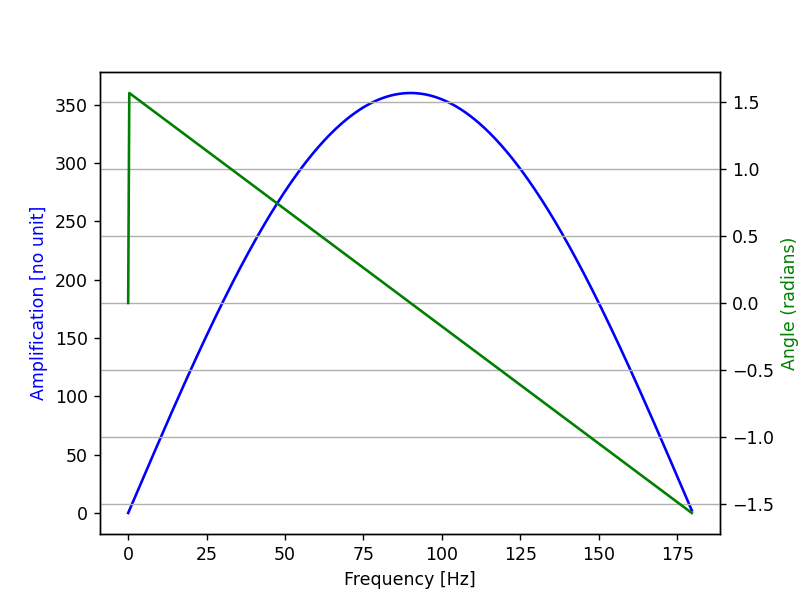

zeros:  [ 1. -1.] 
 poles: [0. 0.]


<IPython.core.display.Javascript object>


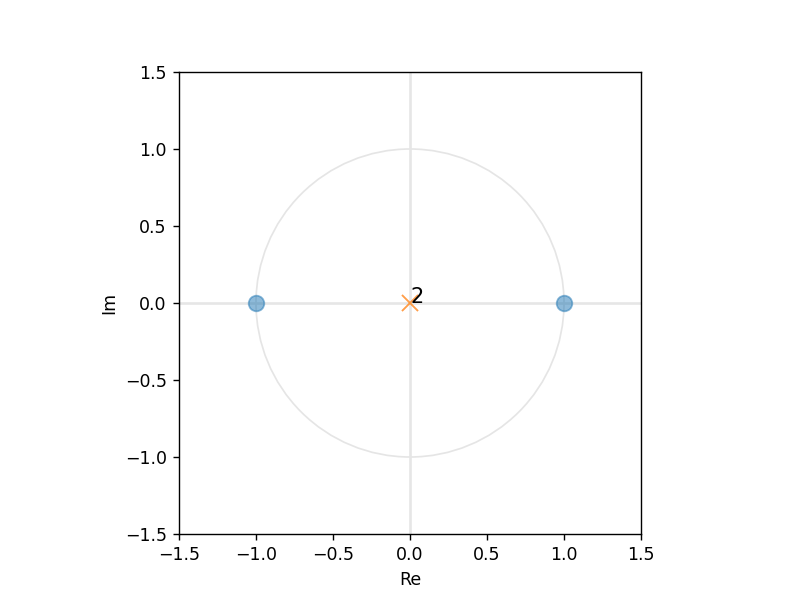

In [7]:
# Three-point central difference operator
### BEGIN SOLUTION
three_point_a = [1, 0, 0]
three_point_b = np.array([1, 0, -1]) * 0.5 * sampling_rate
plot_freq_response(three_point_b, three_point_a, sampling_rate=sampling_rate, log_y=False)
pole_zero_plot(three_point_b, three_point_a)
### END SOLUTION

<IPython.core.display.Javascript object>


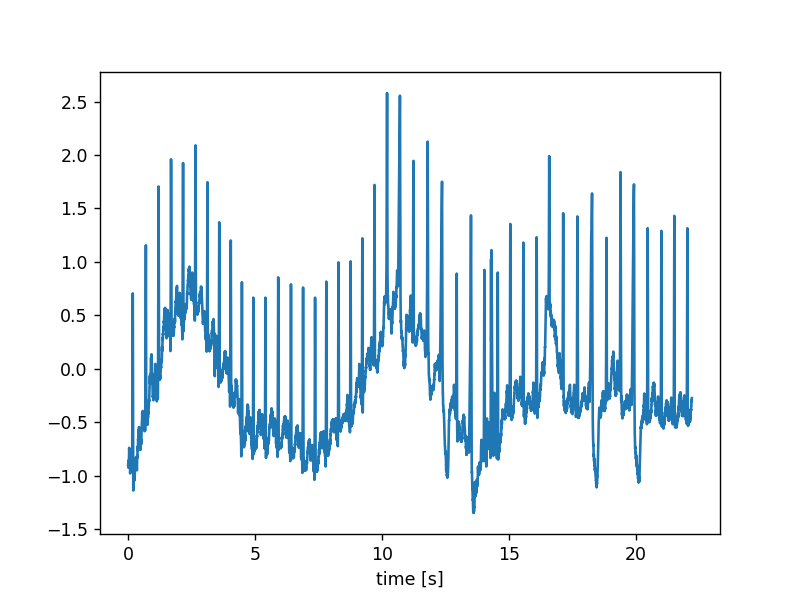

Text(0.5, 0, 'time [s]')

In [8]:
from scipy.misc import electrocardiogram

test_ecg = electrocardiogram()[2000:10000]
test_sampling_rate = 360.
x = np.arange(0, len(test_ecg)) / test_sampling_rate
plt.figure()
plt.plot(x, test_ecg)
plt.xlabel('time [s]')

<IPython.core.display.Javascript object>


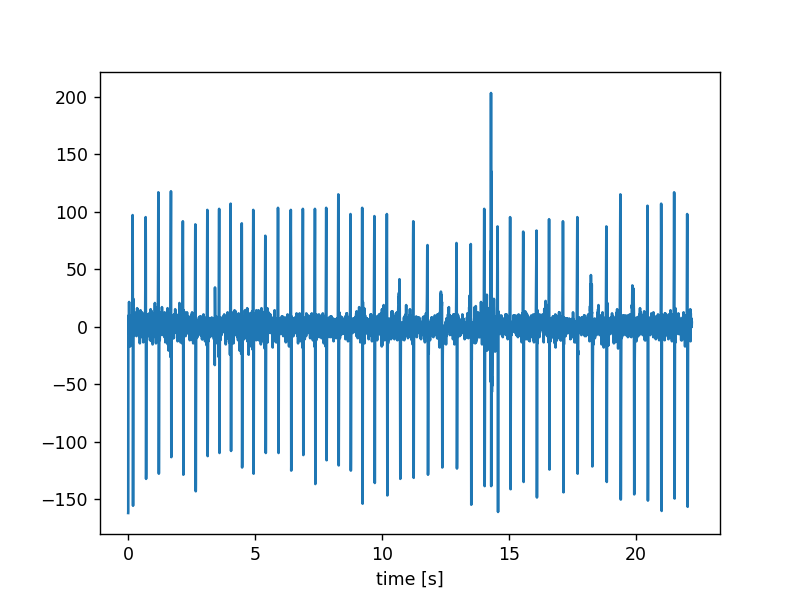

Text(0.5, 0, 'time [s]')

In [9]:
# Apply the filter to the test signal
### BEGIN SOLUTION
filtered_ecg = signal.lfilter(three_point_b, three_point_a, test_ecg)
plt.figure()
plt.plot(x, filtered_ecg)
plt.xlabel('time [s]')
### END SOLUTION

## Exercise 7.3: Designing a filter

While the filter from Ex. 7.2 could remove the baseline drift, it also altered the shape of our QRS complexes.
This is because the filter removes frequency components that are also important for our ECG signal.

By adding additional Poles and Zeros we can manipulate the filter to behave as we want.
Remember that all real systems have a z-plane that is symmetrical to the Real axis.
This means that every Pole or Zero that is not directly located on the Real axis has a “partner” to enforce this symmetry.

a) Remember the relationship between the unit circle in the z-Plane and the sampling frequency. Add a new Zero(s) close to 50% of the Nyquist frequency close to the border of the unit circle.
Plot the frequency response and the Pole-Zero plot of the filter.

b) Describe the effect of the Zero and verify your observation, by placing the Zero at different places. How does the distance to the center of the z-plane effect the result?

c) Repeat a) and b), but this time create a new Pole(s) instead of a Zero(s)

d) Change our filter from Ex. 7.2 in a way that it does not remove all the low frequency components of the ECG signal. Plot its frequency response and apply the filter to see the results.

Note that this differs from the filter shown in the lecture, as our version still filters high frequency noise.
Keep that in mind when comparing your results.

### Solution:

a) 50% of the Nyquist rate is equivalent to an angle of 90 deg in the z-plane (see slide 348 in the lecture).
This mean the new zero is directly on the imaginary axis.
We place it at $0+i0.95$, which is close to the unit circle.

b) The additional Zero lead to a “dip” in the filter response.
The closer it is to the border of the unit circle the larger its influence.
The position of the “dip” can be controlled by the angle the Zero is placed at.

c) A Pole has the opposite effect of a Zero.
It amplifies the signal at that frequency

<IPython.core.display.Javascript object>


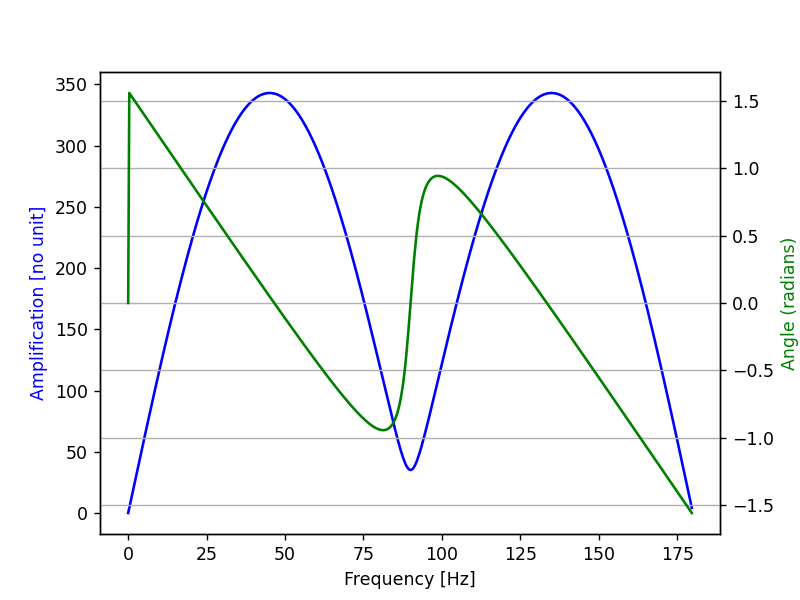

zeros:  [-1.00000000e+00+0.j    1.00000000e+00+0.j   -2.37597944e-17+0.95j
 -2.37597944e-17-0.95j] 
 poles: [0. 0.]


<IPython.core.display.Javascript object>


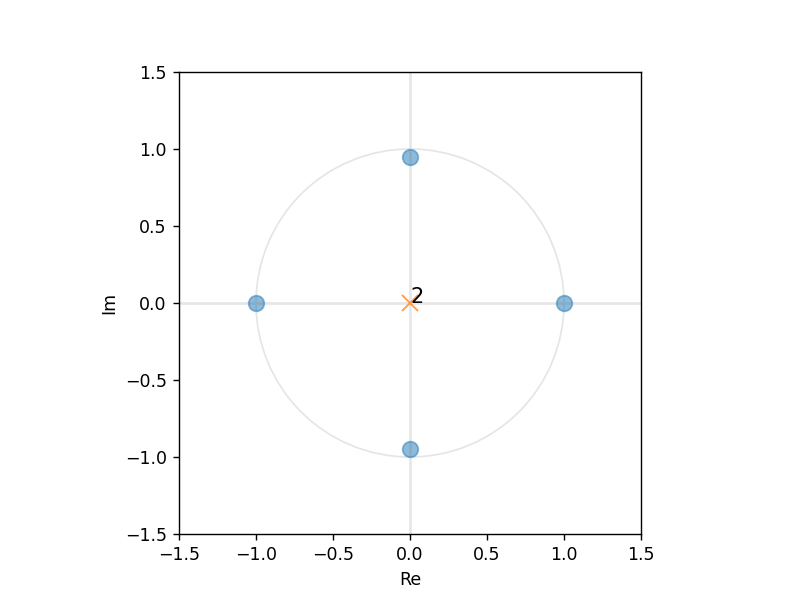

In [10]:
# Adding an additional Zero
# Obtain the poles and zeros of our current filter using scipy.signal.tf2zpk
### BEGIN SOLUTION
zeros, poles, gain = signal.tf2zpk(three_point_b, three_point_a)
### END SOLUTION

# Add the new zero as a complex number to the array
### BEGIN SOLUTION
# Two new zeros -> second one for symetry
zeros = [*zeros, 0+0.95j, 0-0.95j]
### END SOLUTION

# Get the filter coeficients using scipy.signal.zpk2tf and plot the frequency response
### BEGIN SOLUTION
b, a = signal.zpk2tf(zeros, poles, gain)
plot_freq_response(b, a, sampling_rate, log_y=False)
pole_zero_plot(b, a)
### END SOLUTION

<IPython.core.display.Javascript object>


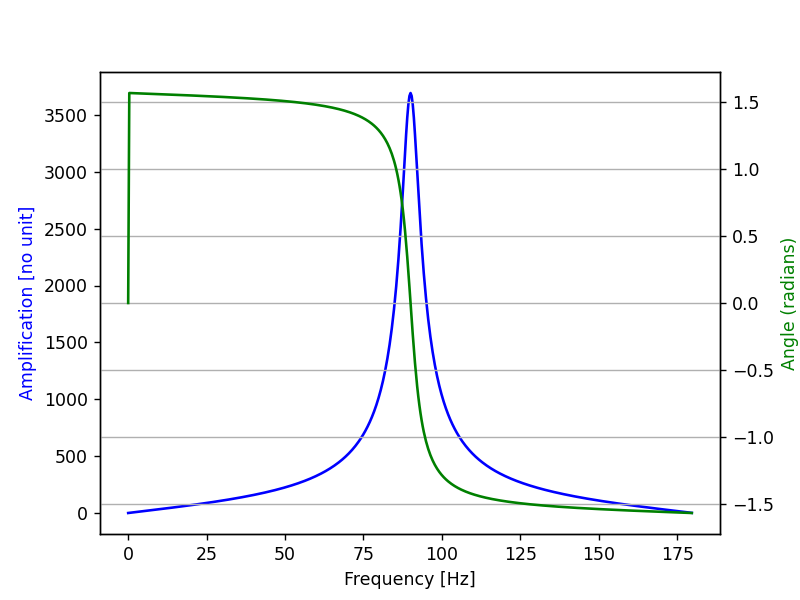

zeros:  [ 1. -1.] 
 poles: [-0.+0.95j  0.-0.95j  0.+0.j    0.+0.j  ]


<IPython.core.display.Javascript object>


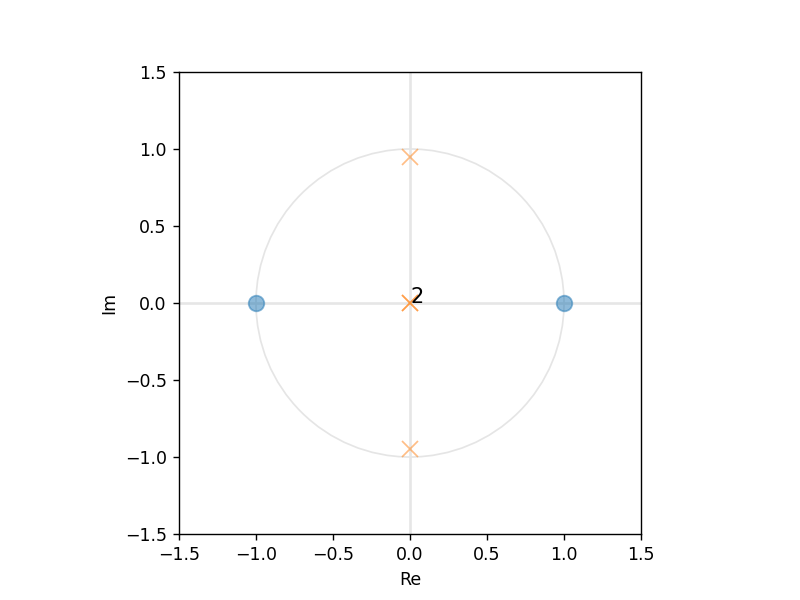

In [11]:
# Adding an additional Pole
# Obtain the poles and zeros of our current filter using scipy.signal.tf2zpk
### BEGIN SOLUTION
zeros, poles, gain = signal.tf2zpk(three_point_b, three_point_a)
### END SOLUTION

# Add the new pole as a complex number to the array
### BEGIN SOLUTION
# Two new poles -> second one for symetry
poles = [*poles, 0+0.95j, 0-0.95j]
### END SOLUTION

# Get the filter coeficients using scipy.signal.zpk2tf and plot the frequency response
### BEGIN SOLUTION
b, a = signal.zpk2tf(zeros, poles, gain)
plot_freq_response(b, a, sampling_rate, log_y=False)
pole_zero_plot(b, a)
### END SOLUTION

<IPython.core.display.Javascript object>


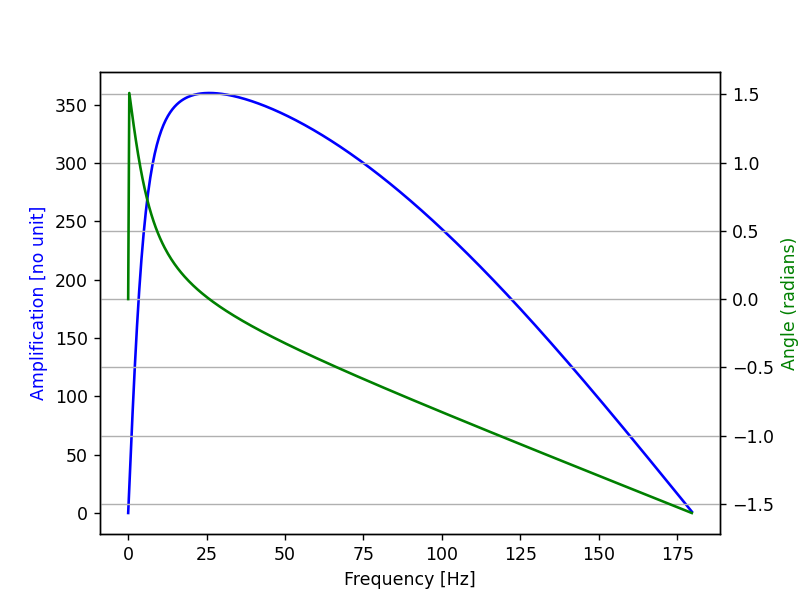

zeros:  [ 1. -1.] 
 poles: [0.9 0.  0. ]


<IPython.core.display.Javascript object>


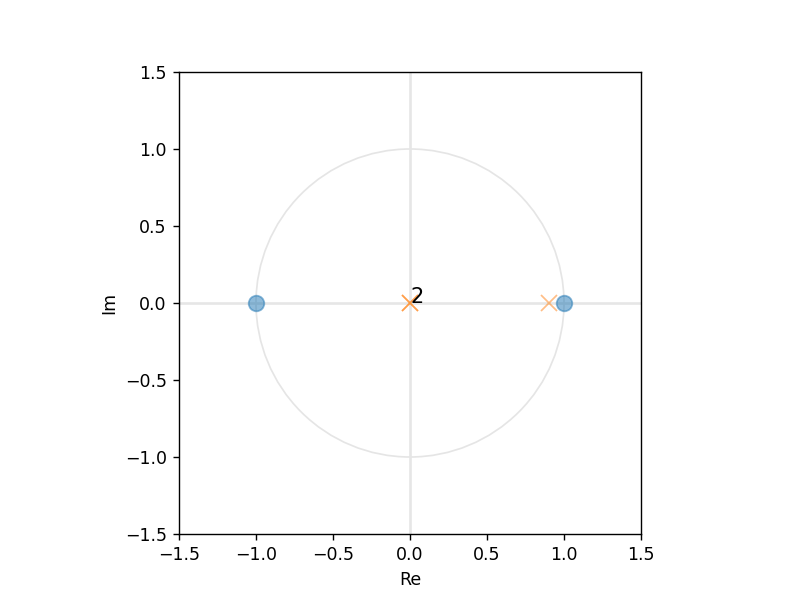

In [12]:
# Obtain the poles and zeros of our current filter using scipy.signal.tf2zpk
### BEGIN SOLUTION
zeros, poles, gain = signal.tf2zpk(three_point_b, three_point_a)
### END SOLUTION

# Add the new pole or zero to improve the filter response at low frequencies
### BEGIN SOLUTION
poles = [*poles, 0.9+0.0j]
### END SOLUTION

# Get the filter coeficients using scipy.signal.zpk2tf and plot the frequency response
### BEGIN SOLUTION
final_b, final_a = signal.zpk2tf(zeros, poles, gain)
plot_freq_response(final_b, final_a, sampling_rate, log_y=False)
pole_zero_plot(final_b, final_a)
### END SOLUTION

<IPython.core.display.Javascript object>


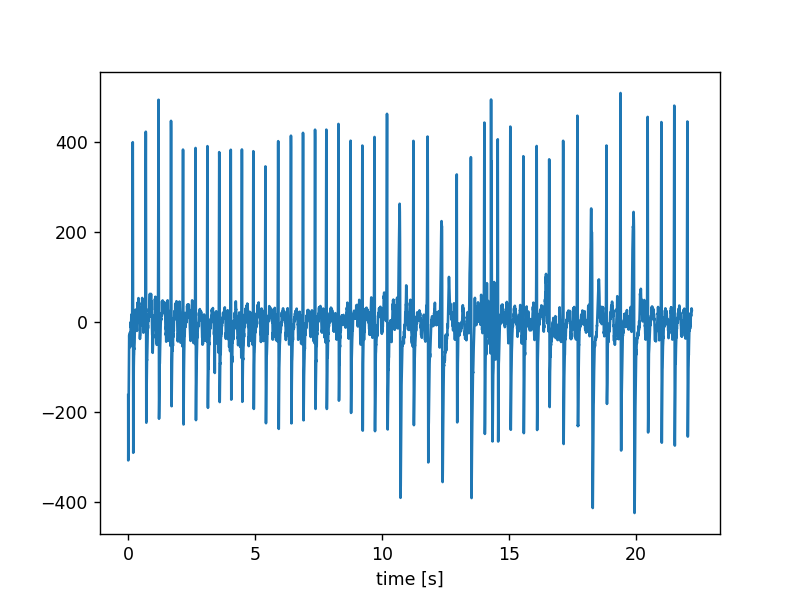

Text(0.5, 0, 'time [s]')

In [14]:
# Apply the filter to the test signal
### BEGIN SOLUTION
filtered_ecg = signal.lfilter(final_b, final_a, test_ecg)
plt.figure()
plt.plot(x, filtered_ecg)
plt.xlabel('time [s]')
### END SOLUTION